In [73]:
import nltk
from nltk.corpus import movie_reviews
import tweepy                  #for accessing twitter API
from textblob import TextBlob  #processing textual data
from wordcloud import WordCloud  #frequency/importance of words in text data
import pandas as pds             #for working with relational data
import numpy as np              #for arrays and matrices
import re                        #regular expressions
import matplotlib.pyplot as plt   #for plotting
plt.style.use('seaborn-talk');
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Importing excel file

In [4]:
from google.colab import files
uploaded=files.upload()

Saving avtweets.xlsx to avtweets.xlsx


Reading file

In [59]:
tweet_data = pds.read_excel('avtweets.xlsx')

Fetching column data of tweets

In [61]:
data = pds.DataFrame(tweet_data, columns=['text'])

In [62]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [63]:
data.head()

,text
0,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...
1,"RT @agntecarter: i’m emotional, sorry!!\n\n201..."
2,saving these bingo cards for tomorrow \n©\n #A...
3,RT @HelloBoon: Man these #AvengersEndgame ads ...
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta..."


In [64]:
#function to clean data
def clean(n):
  n= re.sub(r'@[a-zA-Z0-9_]+', '', n)# getting rid of @mentions
  n= re.sub(r'#', '', n)# getting rid of #
  n= re.sub(r':', '', n)# getting rid of #
  n= re.sub(r'RT[\s]+', '', n)# getting rid of retweets
  n= re.sub(r'https?:\/\/\S+', '', n)# getting rid of links
  return n

In [65]:
#cleaning
data['text']=data['text'].apply(clean)

In [48]:
data

,text,Subjectivity,Polarity,Analysis
0,literally nobody\nme\n\nAvengersEndgame https/...,0.0000,0.000000,neutral
1,"i’m emotional, sorry!!\n\n2014 x 2019\nblackwi...",0.8250,-0.390625,Negative
2,saving these bingo cards for tomorrow \n©\n Av...,0.0000,0.000000,neutral
3,Man these AvengersEndgame ads are everywhere h...,0.0000,0.000000,neutral
4,"We salute you, ! CaptainAmerica AvengersEndgam...",0.0000,0.000000,neutral
...,...,...,...,...
14995,First time Last time ...,0.2000,0.125000,Positive
14996,The AvengersEndgame cast has seen a lot of eac...,0.3875,-0.262500,Negative
14997,kindly announce the approximate timings for i...,0.7500,0.100000,Positive
14998,"We salute you, ! CaptainAmerica AvengersEndgam...",0.0000,0.000000,neutral


In [66]:
#method to check subjectivity
def sub(sub):
  return TextBlob(sub).sentiment.subjectivity
#method to check subjectivity
def pol(pol):
  return TextBlob(pol).sentiment.polarity
#create columns for subjectivity and polarity
data['Subjectivity']=data['text'].apply(sub)
data['Polarity']=data['text'].apply(pol)
#print dataframe
data

,text,Subjectivity,Polarity
0,literally nobody\nme\n\nAvengersEndgame https/...,0.0000,0.000000
1,"i’m emotional, sorry!!\n\n2014 x 2019\nblackwi...",0.8250,-0.390625
2,saving these bingo cards for tomorrow \n©\n Av...,0.0000,0.000000
3,Man these AvengersEndgame ads are everywhere h...,0.0000,0.000000
4,"We salute you, ! CaptainAmerica AvengersEndgam...",0.0000,0.000000
...,...,...,...
14995,First time Last time ...,0.2000,0.125000
14996,The AvengersEndgame cast has seen a lot of eac...,0.3875,-0.262500
14997,kindly announce the approximate timings for i...,0.7500,0.100000
14998,"We salute you, ! CaptainAmerica AvengersEndgam...",0.0000,0.000000


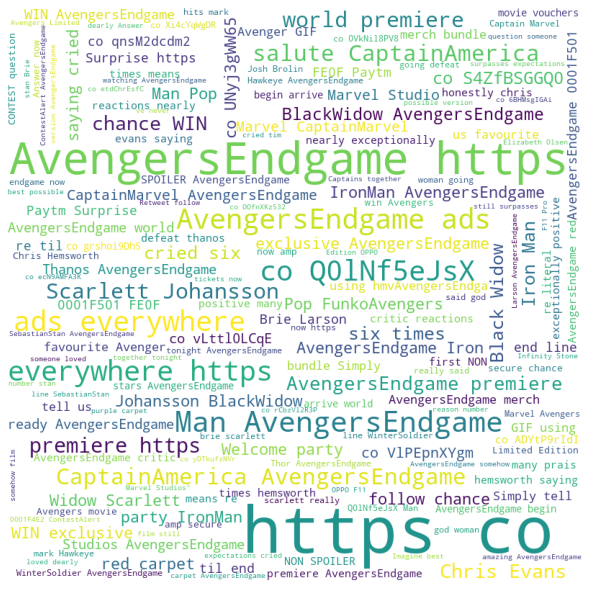

In [13]:
#word cloud
wc=' '.join([txt for txt in data['text']])
#stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, random_state=21,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(wc)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
#positive,neutral and negative analysis
def analysis(dig):
  if dig>0:
    return 'Positive'
  elif dig==0:
    return 'neutral'
  else:
    return 'Negative'

#create new dataframe column to store analysis
data['Analysis']=data['Polarity'].apply(analysis)
#display dataframe
data

,text,Subjectivity,Polarity,Analysis
0,literally nobody\nme\n\nAvengersEndgame https/...,0.0000,0.000000,neutral
1,"i’m emotional, sorry!!\n\n2014 x 2019\nblackwi...",0.8250,-0.390625,Negative
2,saving these bingo cards for tomorrow \n©\n Av...,0.0000,0.000000,neutral
3,Man these AvengersEndgame ads are everywhere h...,0.0000,0.000000,neutral
4,"We salute you, ! CaptainAmerica AvengersEndgam...",0.0000,0.000000,neutral
...,...,...,...,...
14995,First time Last time ...,0.2000,0.125000,Positive
14996,The AvengersEndgame cast has seen a lot of eac...,0.3875,-0.262500,Negative
14997,kindly announce the approximate timings for i...,0.7500,0.100000,Positive
14998,"We salute you, ! CaptainAmerica AvengersEndgam...",0.0000,0.000000,neutral


In [15]:
#string to show positive tweets
i=1
sort=data.sort_values(by=['Polarity'])
for j in range(0,sort.shape[0]):
  if (sort['Analysis'][j]=='Positive'):
    print(str(i)+') '+sort['text'][j])
    print()
    i+=1

Streaming output truncated to the last 5000 lines.

3580) Welcome to the party, ! IronMan AvengersEndgame https//t.co/vLttl0LCqE

3581) Elizabeth Olsen brings the magic. <U+2728> ScarletWitch AvengersEndgame https//t.co/vR2Gloxexc

3582) honestly chris evans saying he cried six times and hemsworth saying he cried more than six times means that we’re all literal…

3583) AvengersEndgame is an astonishing, amazing film. I’ve never seen anything like it. This movie is everything I wanted t…

3584) I refuse to give anything away so all I will say is AvengersEndGame was beautiful and full of messages many of us nee…

3585) Imagine the best possible version of AvengersEndgame and somehow the film still surpasses all expectations. I cried 5-6 tim…

3586) Elizabeth Olsen literally is flawless and still makes me almost faint! AvengersEndgame https//t.co/x9W2p4nCM6

3587) We're extending our GIVEAWAY <U+2764><U+FE0F><U+2764><U+FE0F> <U+0001F64C> One lucky winner will win the ultimate gift. Two ti

In [16]:
from nltk.util import pad_sequence
#string to show negative tweets
p=1
sortdec=data.sort_values(by=['Polarity'],ascending='False')
for t in range(0,sortdec.shape[0]):
  if (sortdec['Analysis'][t]=='Negative'):
    print(str(p)+') '+sortdec['text'][t])
    print()
    p+=1

1) i’m emotional, sorry!!

2014 x 2019
blackwidow
captainamerica https//t.co/xcwkCMw18w

2) Boy... These two fuckers will beat the holy shit outta ours feelings this next helluva weekend.

AvengersEndgame 
GameOfThr…

3) Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame https//t.co/UNyj3gWW65

4) Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame https//t.co/UNyj3gWW65

5) The debacle of Kalank is definitely going to have a positive impact for AvengersEndgame ... as audiences shy away and aw…

6) Just a little live entertainment with ... AvengersEndgame https//t.co/ixKARCtQOY

7) Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame https//t.co/UNyj3gWW65

8) Endgame is here! LA world premiere is in just a few hours AvengersEndgame  https//t.co/zTN4LkuJLm

9) Just a little live entertainment with ... AvengersEndgame https//t.co/ixKARCtQOY

10) Black Widow herself, Scarlett Johansson. BlackWidow AvengersEndgame https//t.co/UNyj3gWW65

11)

<function matplotlib.pyplot.show>

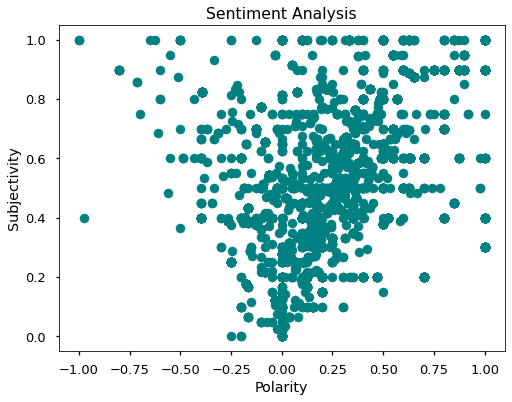

In [17]:
#plot polarity and subjectivite
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='teal')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [18]:
#positive tweet percentage
post=data[data.Analysis=='Positive']
post=post['text']
round(post.shape[0]/data.shape[0]*100,2)

36.48

In [19]:
#negative tweet percentage
negt=data[data.Analysis=='Negative']
negt=negt['text']
round(negt.shape[0]/data.shape[0]*100,2)

7.46

In [20]:
#neutral tweet percentage
newt=data[data.Analysis=='neutral']
newt=newt['text']
round(newt.shape[0]/data.shape[0]*100,2)

56.06

<function matplotlib.pyplot.show>

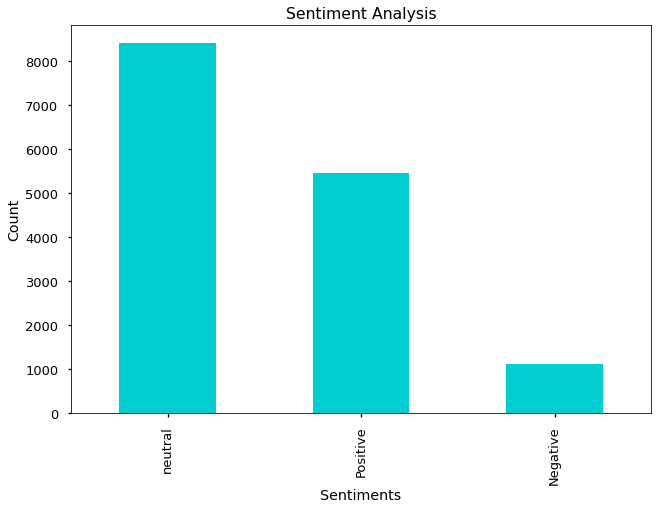

In [21]:
#show counts
data['Analysis'].value_counts()
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
data['Analysis'].value_counts().plot(kind='bar',color='darkturquoise')
plt.show

Naive Bayes Algorithm

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import twitter_samples

In [23]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [24]:
# select the set of positive and negative tweets
apt = twitter_samples.strings('positive_tweets.json')
ant = twitter_samples.strings('negative_tweets.json')

In [25]:
print('Number of positive tweets: ', len(apt))
print('Number of negative tweets: ', len(ant))

print('\nThe type of all_positive_tweets is: ', type(apt))
print('The type of a tweet entry is: ', type(ant[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [53]:
def rid(val):
  ary=[]
  ar=[]
  for t in val:
    t= re.sub(r'@[a-zA-Z0-9_]+', '', t)# getting rid of @mentions
    t= re.sub(r'#', '', t)# getting rid of #
    t= re.sub(r':', '', t)# getting rid of :
   # t= re.sub(r')', '', t)# getting rid of )
    #t= re.sub(r'(', '', t)# getting rid of (
    #t= re.sub(r'/', '', t)# getting rid of :
    t= re.sub(r'RT[\s]+', '', t)# getting rid of retweets
    t= re.sub(r'https?:\/\/\S+', '', t)# getting rid of links
    t= re.sub(r'https?\/\/\S+', '', t)# getting rid of links
    #t= re.sub(r'https?:\/\/.*[\r\n]*+', '', t)# getting rid of links
    #t= re.sub(r'https?\/\/.*[\r\n]*+', '', t)# getting rid of links
    t= re.sub(r'^RT[\s]+', '', t)# getting rid of retweets
    ary+=t
  ar=''.join(map(str, ary))
  return ar
#cleaning all positive tweets
aptarr=[]
for i in apt:
  s=clean(i)
  aptarr.append(s)
print(aptarr)
print(len(aptarr))
#cleaning all negative tweets
antarr=[]
for i in ant:
  s=clean(i)
  antarr.append(s)
print(antarr)
print(len(antarr))

['FollowFriday    for being top engaged members in my community this week )', ' Hey James! How odd / Please call our Contact Centre on 02392441234 and we will be able to assist you ) Many thanks!', ' we had a listen last night ) As You Bleed is an amazing track. When are you in Scotland?!', ' CONGRATS )', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile ) in 15 days', '  This one is irresistible )\nFlipkartFashionFriday http//t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF ) https//t.co/smyYriipxI", ' On second thought, there’s just not enough time for a DD ) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.\n\nWell… as the name implies p.', 'FollowFriday   for being top influencers in my community this week )', "Who Wouldn't L

In [40]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenizing(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens

In [39]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remstop(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

In [34]:
stemmer = PorterStemmer()

def stemming(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [67]:
#combining the methods above
def process_tweet(tweet):
    
    processed_tweet = clean(tweet)
    tweet_tokens = tokenizing(processed_tweet)
    tweets_clean = remstop(tweet_tokens)
    ptweets = stemming(tweets_clean)
    
    return ptweets

In [68]:
#cleaning
data['text']=data['text'].apply(process_tweet)

In [69]:
data

,text,Subjectivity,Polarity
0,"[liter, nobodi, avengersendgam, http, t.co/lr9...",0.0000,0.000000
1,"[’, emot, sorri, 2014, x, 2019, blackwidow, ca...",0.8250,-0.390625
2,"[save, bingo, card, tomorrow, ©, avengersendga...",0.0000,0.000000
3,"[man, avengersendgam, ad, everywher, http, t.c...",0.0000,0.000000
4,"[salut, captainamerica, avengersendgam, http, ...",0.0000,0.000000
...,...,...,...
14995,"[first, time, last, time, aveng, aveng, 2010, ...",0.2000,0.125000
14996,"[avengersendgam, cast, seen, lot, year, figur,...",0.3875,-0.262500
14997,"[kindli, announc, approxim, time, imax, ticket...",0.7500,0.100000
14998,"[salut, captainamerica, avengersendgam, http, ...",0.0000,0.000000


In [72]:
datary=[]
for name in data['text']:
    words=str(name).split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    datary+=stripped
print(datary)

['liter', 'nobodi', 'avengersendgam', 'http', 'tcolr9kfwfd5c', '’', 'emot', 'sorri', '2014', 'x', '2019', 'blackwidow', 'captainamerica', 'http', 'tcoxcwkcmw18w', 'save', 'bingo', 'card', 'tomorrow', '©', 'avengersendgam', 'http', 'tcod6for0jwrb', 'man', 'avengersendgam', 'ad', 'everywher', 'http', 'tcoq0lnf5ejsx', 'salut', 'captainamerica', 'avengersendgam', 'http', 'tcovlpepnxygm', 'first', 'nonspoil', 'avengersendgam', 'critic', 'reaction', 'nearli', 'except', 'posit', 'mani', 'prai', '…', 'readi', 'rock', 'excit', 'avengersendgam', 'presstourcontinu', 'worldpremier', 'endgam', 'http', 'tcokxpknjl9aq', '’', '‘', 'til', 'end', 'line', 'wintersoldi', 'avengersendgam', 'http', 'tcoxi4cyqwgdr', 'avengersendgam', 'first', 'reaction', 'emot', 'epic', 'mcu', 'film', 'http', 'tcow4cojzzhpl', 'man', 'avengersendgam', 'ad', 'everywher', 'http', 'tcoq0lnf5ejsx', 'destini', 'arriv', 'josh', 'brolin', 'thano', 'avengersendgam', 'http', 'tcoklb2zrk0pr', 'salut', 'captainamerica', 'avengersendgam'

In [83]:
#test_pos = apt[4000:]
train_pos = apt
#test_neg = all_negative_tweets[4000:]
train_neg = ant

train_x = train_pos + train_neg
#test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
#test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [88]:
def crefreq(tweets, ys):
    
    freq_d = {}

    # TODO: Create frequency dictionary
    ...
    for tweet,y in zip(tweets,ys):
      for word in process_tweet(tweet):
        pair=(word,y)
        if pair in freq_d:
          freq_d[pair]+=1
        else:
          freq_d[pair]=freq_d.get(pair,1)
    return freq_d

In [89]:
tweet = ['i am glad', 'i am tricked', 'i am sad', 'i am tired', 'i am tired','i am happy']
ys = [1, 0, 0, 0, 0,1]

freq_d = crefreq(tweet, ys)
print(freq_d)

{('glad', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2, ('happi', 1): 1}


Training model using naive bayes

In [105]:
freqs = crefreq(train_x, train_y)
print(freqs)

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 131, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('http', 1.0): 1191, ('t.co/ebz0l2venm', 1.0): 1, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 401, ('custom', 1.0): 4, ('wait', 1.0

In [106]:

def train_naive_bayes(freqs, train_x, train_y):
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # TODO: get N_pos and N_get
        if pair[1]>0:
          N_pos+=freqs[(pair)]
        else:
          N_neg+=freqs[(pair)] 
    # TODO: calculate the number of documents (tweets)
    D = train_y.shape[0]
    
    # TODO: calculate D_pos, the number of positive documents (tweets)
    D_pos = sum(train_y)
    
    # TODO: calculate D_neg, the number of negative documents (tweets)
    D_neg = D-sum(train_y)
    
    # TODO: calculate logprior
    logprior = np.log(D_pos)-np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg =  freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos+1)/(N_pos+V)
        p_w_neg = (freq_neg+1)/(N_neg+V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood

In [107]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
12136


In [108]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
  
    # TODO: process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # TODO: initialize probability to zero
    p = 0

    # TODO: add the logprior
    p += logprior

    for word in word_l:

        # TODO: get log likelihood of each keyword
        if word in loglikelihood:
          p+=loglikelihood(word)

    return p

In [113]:
for tweet in data['text']:
    # print( '%s -> %f' % (tweet, naive_bayes_predict(tweet, logprior, loglikelihood)))
    a = naive_bayes_predict(str(tweet), logprior, loglikelihood)
#     print(f'{tweet} -> {p:.2f} ({p_category})')
    print(f'{tweet} -> {a:.2f}')

TypeError: ignored